In [42]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv')

#load the data to Pandas
# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(data)
df.head() #or df[:5] to display the first 5 rows

C:\Users\ZBook\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (20,21,22,23,24,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Serial,Issuing_Office,Receipt_Number,Insured,Policy_Number,Insured_Tel,Email,Insurer,Broker_Agent,Reg_No,...,Suspension_System,"Tyre_condition(FR, RR, SPARE)","Tyre_condition(FL, RL, OTHERS)",Braking_System,Extras,Remarks,Windscreen_Price_Est,Anti_Theft_Price_Est,Player_Price_Est,images
0,HU /IN/110012012,HURLINGHAM,LETTER BRT,EASTERN AFRICA STANDBY BRIGADE ...,551/700/1/000557/2010/10,TBA,,BRITAM GENERAL INSURANCE COMPANY LTD,NaN,KX75A01,...,NaN,,NaN,NaN,"3RD BRAKE LIGHT, REAR WIPER, SIDE STEP, GEAR L...",LOCAL,"30,000","15,000","20,000","../images/header1.jpg,../images/watermark.jpg,..."
1,HU /IN/210012012,HURLINGHAM,LETTER BRT,EASTERN AFRICA STANDBY BRIGADE ...,551/700/1/000557/2010/10,TBA,,BRITAM GENERAL INSURANCE COMPANY LTD,NaN,KX75A17,...,NaN,,NaN,NaN,"3RD BRAKE LIGHT, ALLOY RIMS, INTERIOR WOOD FIN...",LOCAL.,"20,000",FACTORY FITTED,"20,000","../images/header1.jpg,../images/watermark.jpg,..."
2,KS /IN/309012012,KISUMU,L/FIRST ASURANCE,HESBON MOCHAMA MOGUSU ...,11/20/020522/08,0720 076313,NaN,FIRST ASSURANCE LTD,NaN,KBH548P,...,NaN,,NaN,NaN,"THIRD BRAKE LIGHT, ALLOY RIMS, DUAL SRS AIR BA...",,CRACKED,N/F,"20,000","../images/header1.jpg,../images/watermark.jpg,..."
3,ME /IN/416012013,MERU,LTR CIC,THUURA SECONDARY SCHOOL ...,011/085/1/007419/2013/01,TBA,NaN,COOPERATIVE INSURANCE CO.,TBA,KBQ654D,...,NaN,,NaN,NaN,"CARRIER,POWER STEERING,ENGINE BRAKE,REAR AND F...",NONE,"20,000",NOT FITTED,"20,000","../images/header1.jpg,../images/watermark.jpg,..."
4,ME /IN/516012013,MERU,697581/CHARTIS,ANTHONY M. BIKUNDO,COMP012042679,,NaN,AIG KENYA INSURANCE COMPANY LTD,TBA,KBH989W,...,NaN,,NaN,NaN,"WHEEL CAP,ROOF RAILS,SUSPENSION SPACERS,ABS,PO...",JAPAN,"20,000","10,000","20,000","../images/header1.jpg,../images/watermark.jpg,..."


In [4]:
df.describe() #the mean, standard deviation, and various percentiles for all of your numeric columns

,Serial,Issuing_Office,Receipt_Number,Insured,Policy_Number,Insured_Tel,Email,Insurer,Broker_Agent,Reg_No,...,Suspension_System,"Tyre_condition(FR, RR, SPARE)","Tyre_condition(FL, RL, OTHERS)",Braking_System,Extras,Remarks,Windscreen_Price_Est,Anti_Theft_Price_Est,Player_Price_Est,images
count,181879,181879,181626,181879,178913,140228,49618,178764,157727,181878,...,5,181879,5,5,180434,119409,176372,177757,177266,202085
unique,181879,25,58848,94442,86250,53755,1774,56,5452,117855,...,4,6,5,5,164592,1598,268,497,409,49
top,EB /IN/1817010092008,EMBAKASI,LETTER,UNIVERSITY OF NAIROBI ...,TBA,,,AIG KENYA INSURANCE COMPANY LTD,TBA,KAL679S,...,SERVICEABLE,,"GOOD,GOOD,N/A",SATISFACTORY WITH GOOD STOPPING DISTANCE,NONE,,"20,000","10,000","20,000","../images/header1.jpg,../images/watermark.jpg,..."
freq,1,47121,21282,726,40869,17104,27720,38607,111064,10,...,2,181874,1,1,2027,56289,87677,85653,71235,181832


In [51]:
df['Issuing_Office'].value_counts()

EMBAKASI           47121
HURLINGHAM         36812
AIG                19124
MOMBASA            15860
SARIT CENTRE       11556
NAKURU             10413
THIKA              10006
MERU                6182
KISUMU              5167
NYERI               5031
ELDORET             4611
BURU BURU           3528
KISII               2389
EMBU                1385
NAIVASHA            1191
KERICHO              546
NANYUKI              364
KARATINA             182
MACHAKOS             182
KITALE                86
KITUI                 60
CIC - AA OFFICE       53
CHUKA                 19
VILL.MARKET           10
RONGAI                 1
Name: Issuing_Office, dtype: int64

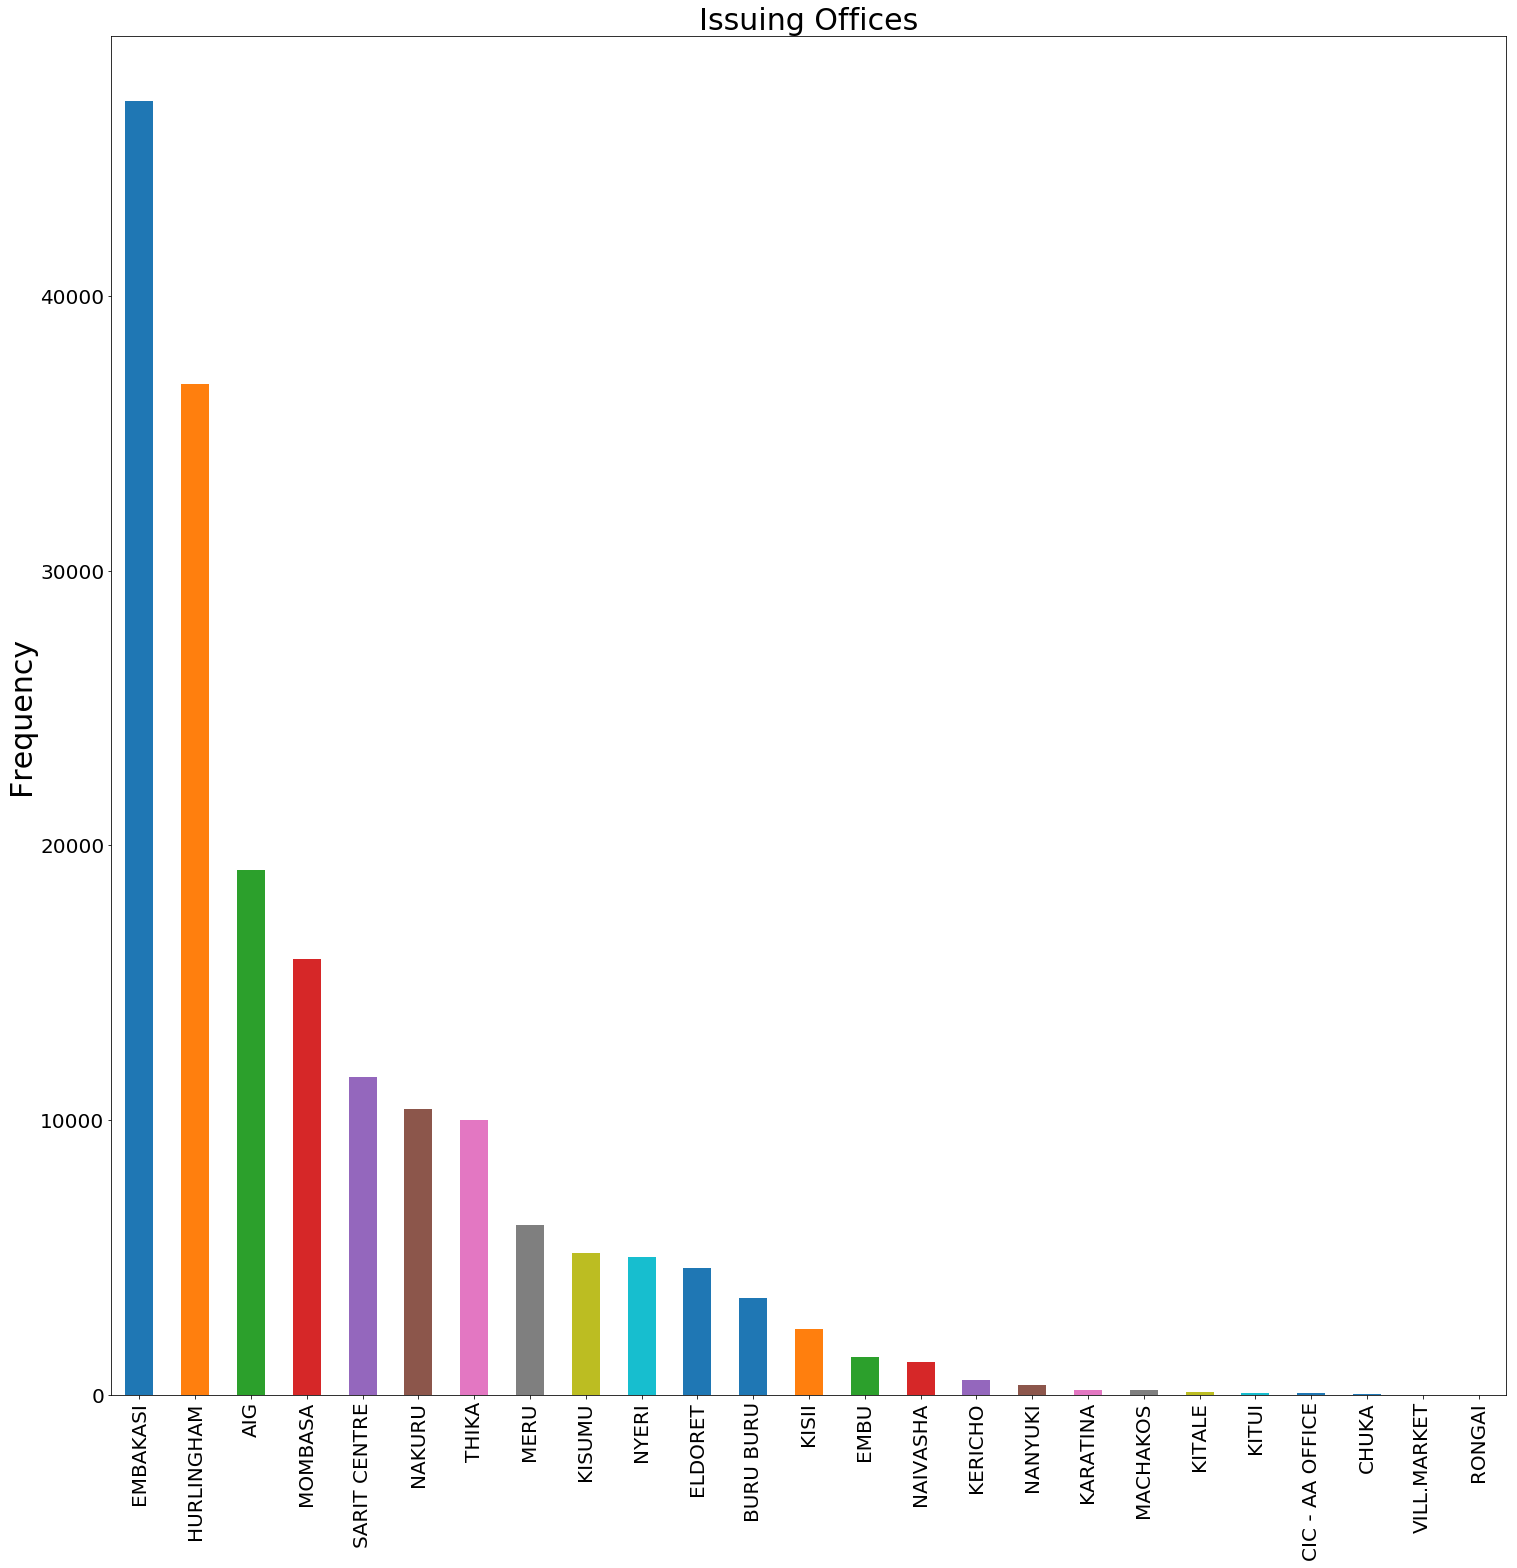

In [52]:
office_plot=df['Issuing_Office'].value_counts().plot(kind='bar', title='Issuing Offices', figsize=(25,25), fontsize=20)
office_plot.set_ylabel('Frequency', fontsize=30)
office_plot.title.set_size(30)
plt.savefig('Issuing Offices.png', bbox_inches="tight")

In [53]:
#filter out where insurers haven't been provided
booleans = []
for result in df.Insurer:
    #append true if result is either TBA or T B A, and otherwise false
    if result=='TBA' or result=='T B A':
        booleans.append(False)
    else:
        booleans.append(True)

print(booleans[35:80])
print(len(booleans))

#create a Pandas Series
insurerfilter = pd.Series(booleans)
#create new dataframe
insurer_filtered = df[insurerfilter]

[True, True, True, True, False, True, True, True, True, True, True, True, True, False, False, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, False, False, False, False, False, True, True, True, True, True, True]
202085


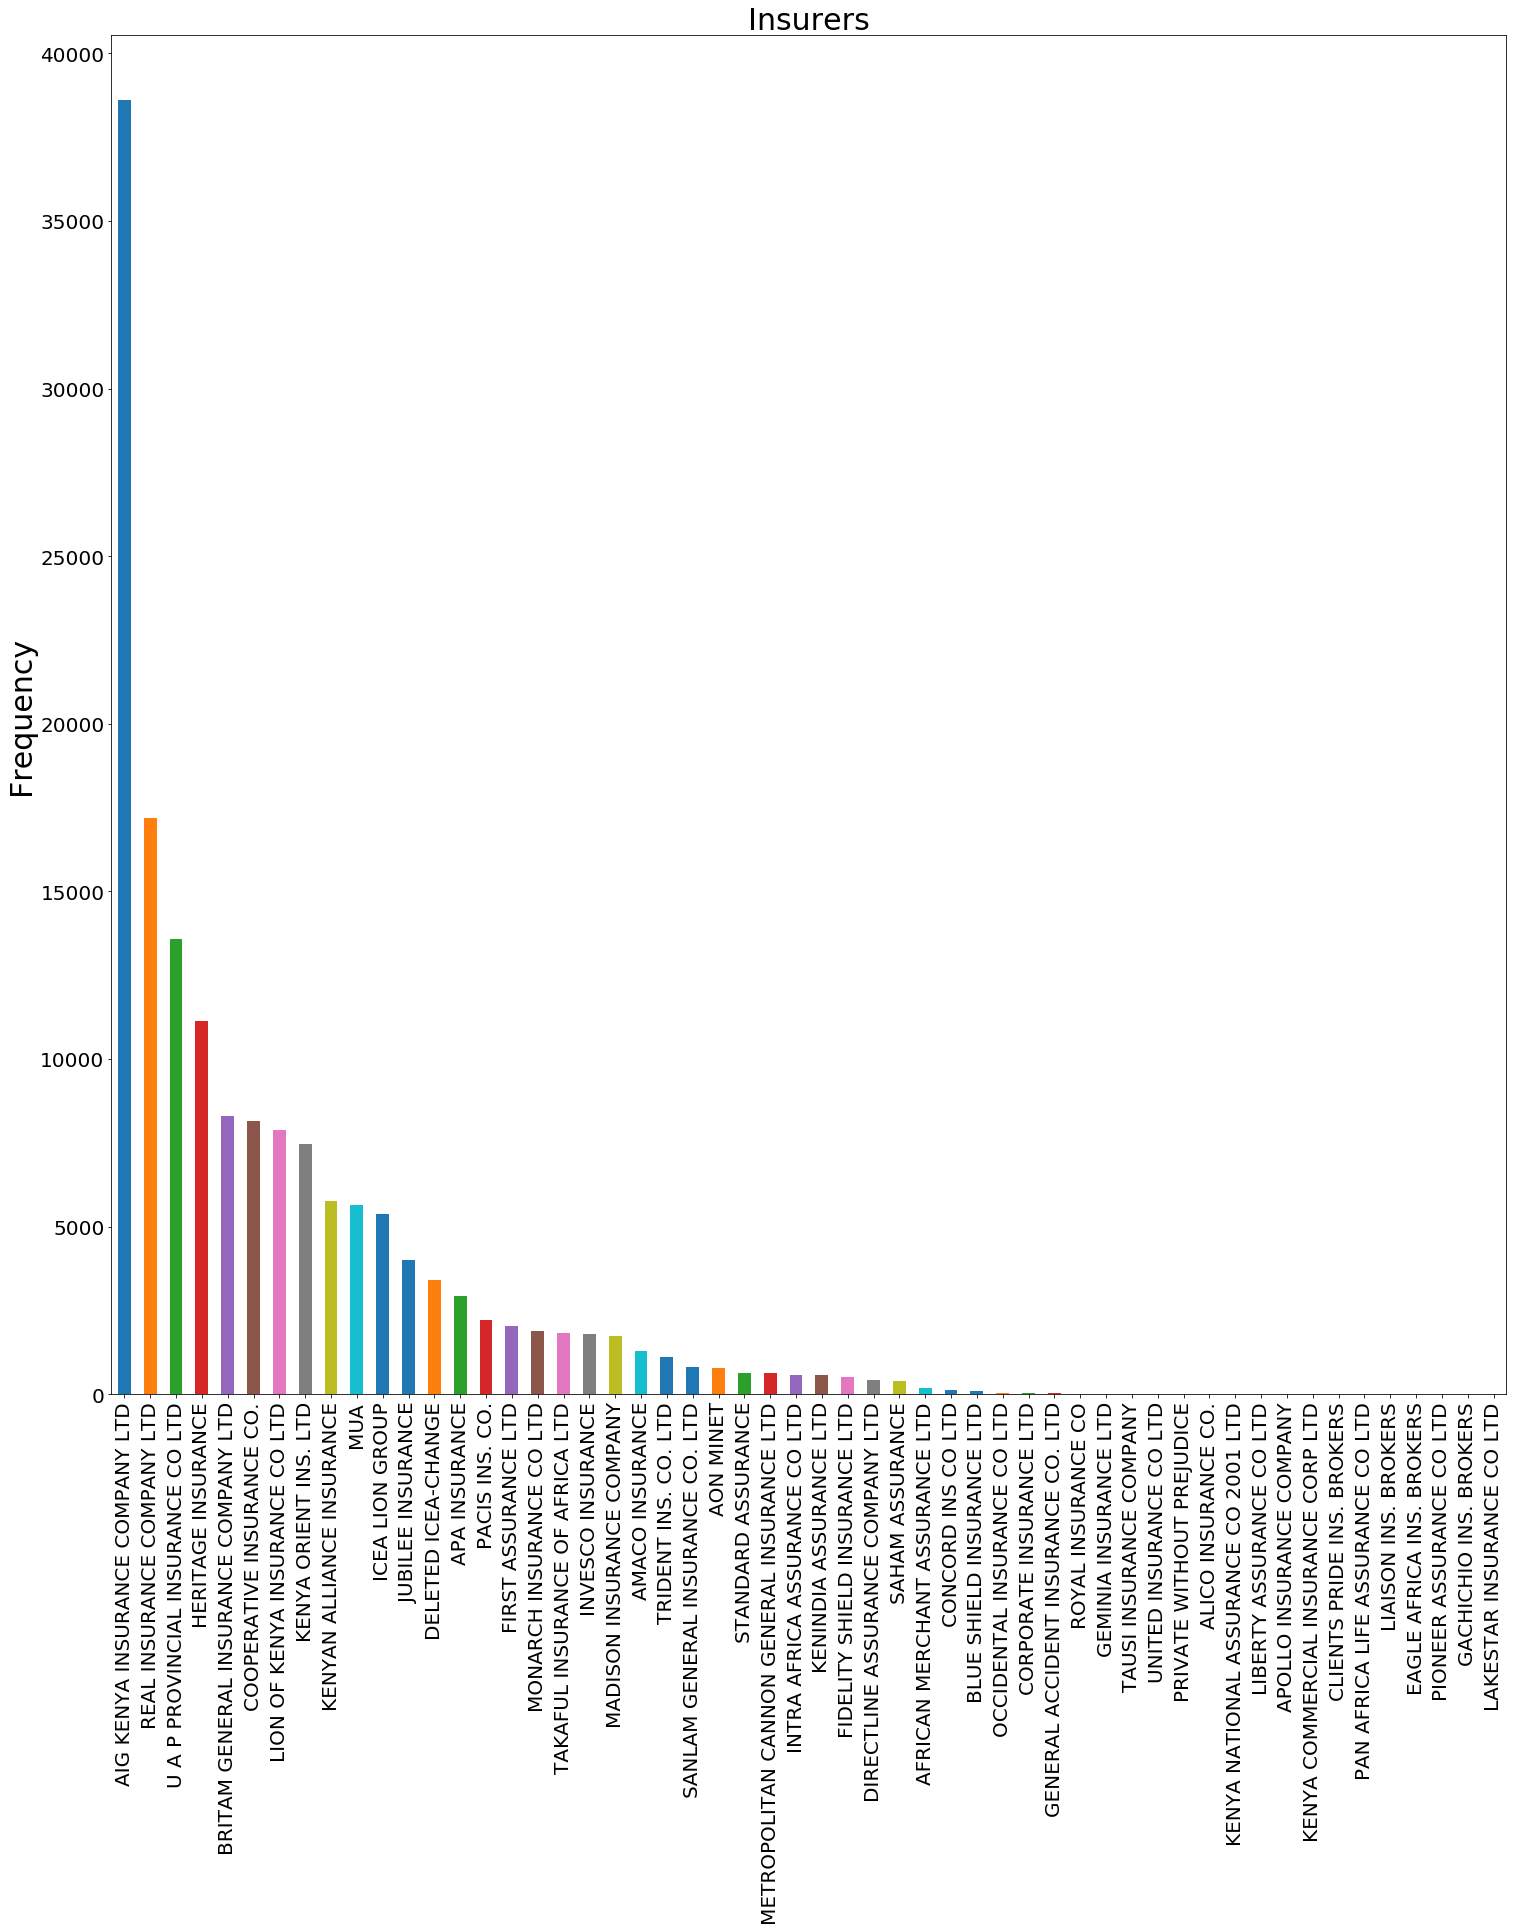

In [54]:
insurer_plot = insurer_filtered['Insurer'].value_counts().plot(kind='bar', title='Insurers', figsize=(25,25), fontsize=20)
insurer_plot.set_ylabel('Frequency', fontsize=30)
insurer_plot.title.set_size(30)
plt.savefig('Insurers.png', bbox_inches="tight")

In [55]:
#new bool array to filter dataframe, negate tomake filtering suitable, ignore null values
insuredfilter = ~(df.Insured.str.contains('N/A', na=False))
print(insuredfilter[335:340])
#create new dataframe
insured_filtered = df[insuredfilter]

335     True
336     True
337     True
338    False
339     True
Name: Insured, dtype: bool


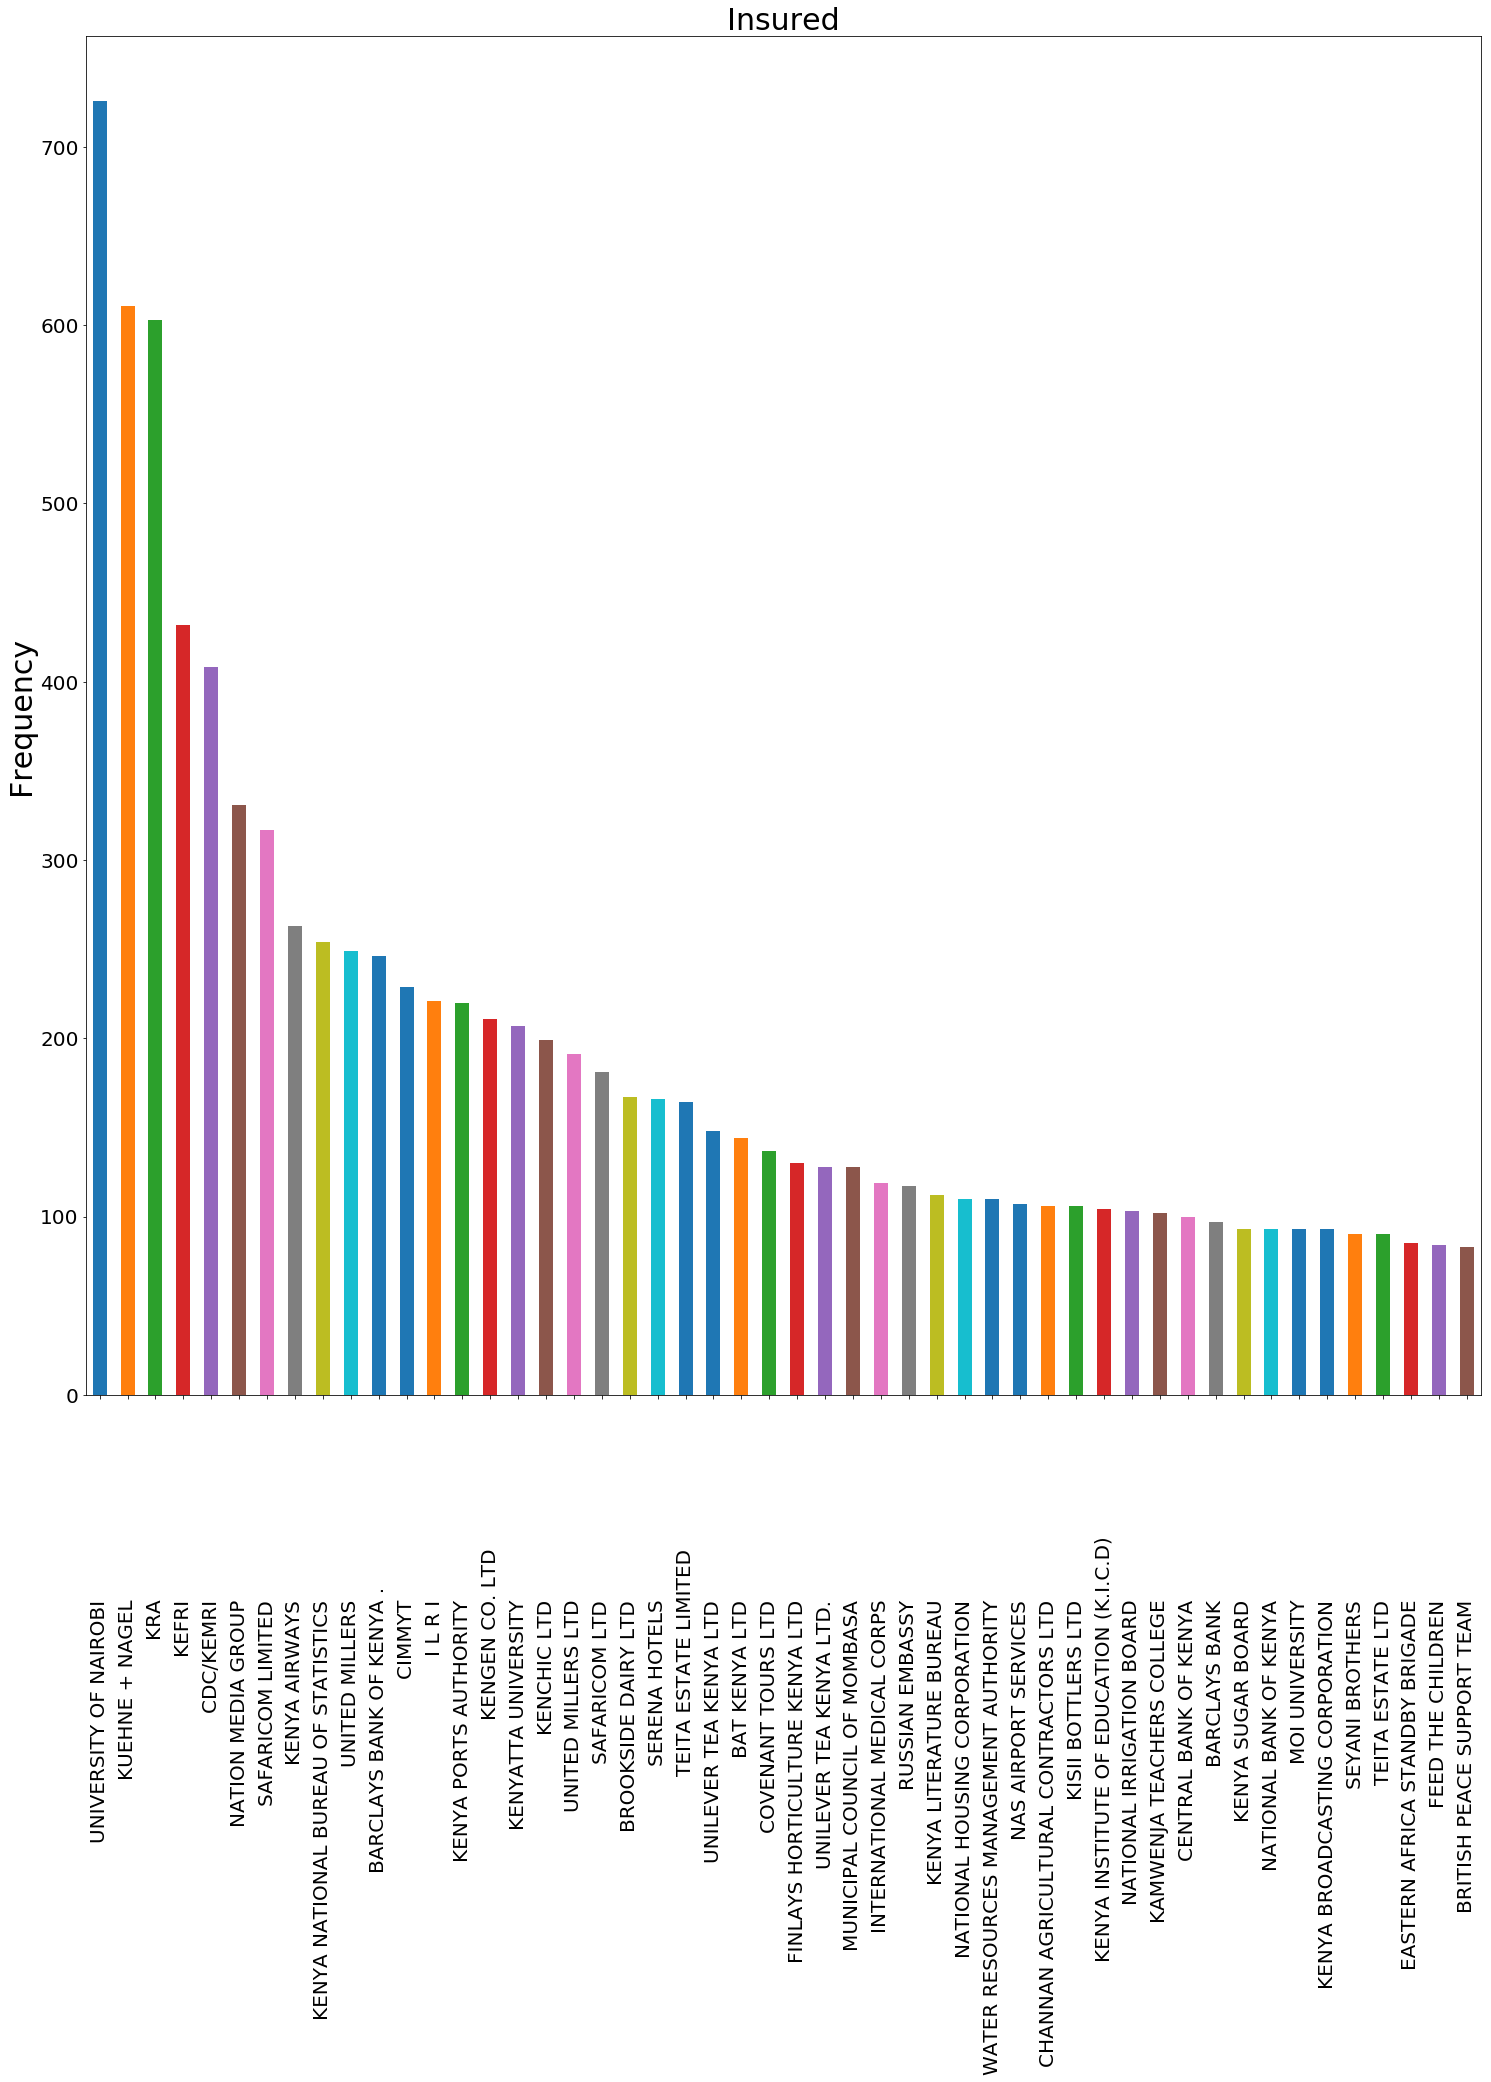

In [56]:
insured_plot = insured_filtered['Insured'].value_counts()[:50].plot(kind='bar', title='Insured', figsize=(25,25), fontsize=20)
insured_plot.set_ylabel('Frequency', fontsize=30)
insured_plot.title.set_size(30)
plt.savefig('Insured.png', bbox_inches="tight")

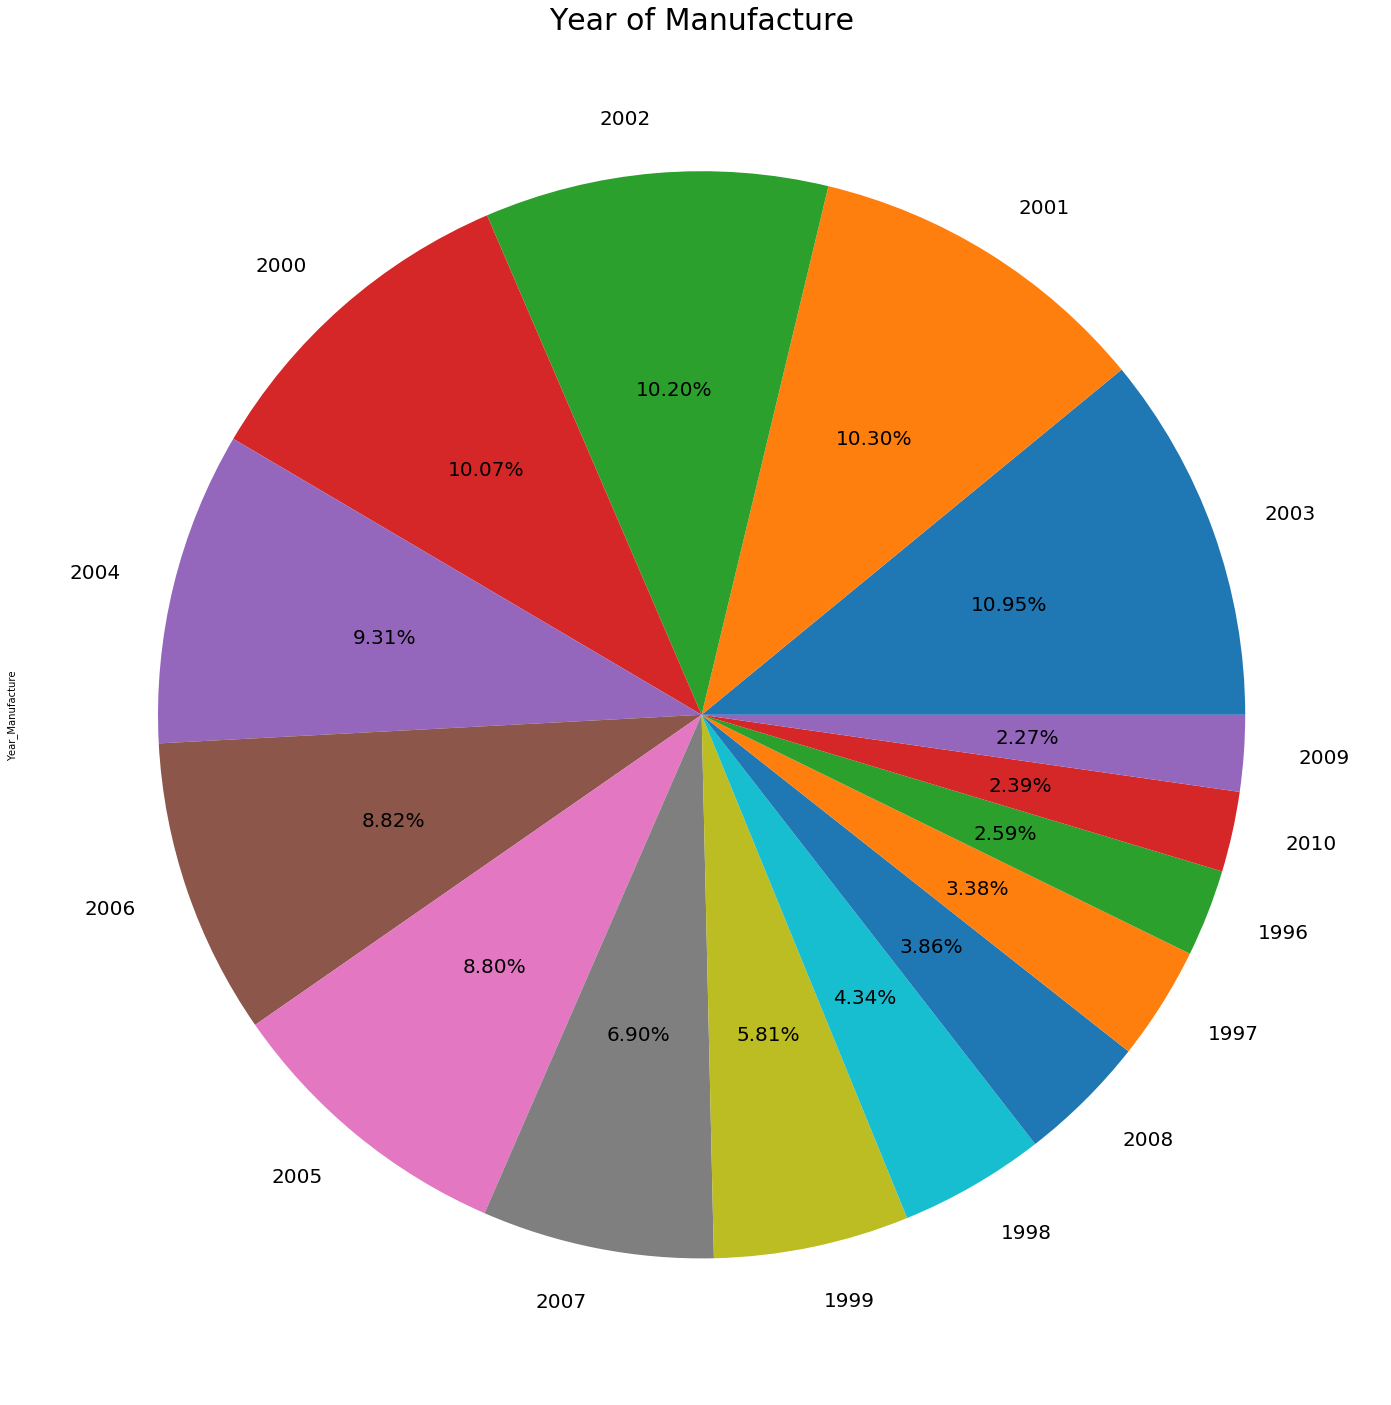

In [57]:
year_plot = df['Year_Manufacture'].value_counts()[:15].plot(kind='pie', figsize=(25,25), fontsize=20, autopct='%1.2f%%')
year_plot.set_title('Year of Manufacture', fontsize=30)
plt.savefig('Year of Manufacture.png')